In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xspec
from xspec import *
from xspec import AllModels, AllData, Fit, Plot

AllData.clear()
AllModels.clear()

basepathmod = '/mnt/c/Users/User/Downloads/chspec-main/'
AllModels.lmod('chspec', dirPath=basepathmod)
print("Model package chisoth successfully loaded.")


Model package chspec successfully loaded.
Model package chisoth successfully loaded.


In [11]:

import glob


files = sorted(glob.glob("content/files1/" + "*.pha"))


# Initialize lists to store the results
temperatur = []

norm = []

r_chi=[]
time1=[]
Fe_abun=[]
Fe_linear=[]
Fe_err=[]
Fe_lerr=[]
Fe_uerr=[]
timeF = []
Ni_abun=[]
Ni_err=[]
Ni_linear=[]
Ni_lerr=[]
Ni_uerr=[]
timeN = []
Si_abun=[]
Si_err=[]
Si_linear=[]
Si_lerr=[]
Si_uerr=[]
timeSi = []
Ca_abun=[]
Ca_err=[]
Ca_linear=[]
Ca_lerr=[]
Ca_uerr=[]
timeC = []
Ar_abun=[]
Ar_err=[]
Ar_linear=[]
Ar_lerr=[]
Ar_uerr=[]
timeA = []
S_abun=[]
S_err=[]
S_linear=[]
S_lerr=[]
S_uerr=[]
timeS=[]
Mg_err=[]
Mg_abun=[]
timeMg=[]
#Al_err=[]
#Al_abun=[]
# Load the data file

Plot.device = '/xw'    
Plot.xAxis = 'keV'

#Plot('ld')


#for j in range(40):
for i, file in enumerate(files):
   
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(f"{file}")
    
    
    spec.ignore("**-2.8 12.0-**")
    
    
    xspec.AllModels.clear()
    model1 = xspec.Model("chisoth")

    # xspec.Fit.perform()
    model1(1).values=[7]  
    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
    #model1(16).frozen=False # S abundance
    #model1(14).frozen=False #Si abundance
    #model1(13).frozen=False
    #model1(12).frozen=False
    xspec.Fit.perform()
 
    
    if model1(26).sigma<=2:
          Fe_abun.append(model1(26).values[0])
          Fe_err.append(model1(26).sigma)
          timeF.append(i * 27)
        
    
    if model1(20).sigma<=2:
          Ca_abun.append(model1(20).values[0])
          Ca_err.append(model1(20).sigma)
          timeC.append(i * 27)
    
    
    if model1(18).sigma<=2:
          Ar_abun.append(model1(18).values[0]) 
          Ar_err.append(model1(18).sigma)
          timeA.append(i * 27)
        
    
    if model1(28).sigma<=2:
          Ni_abun.append(model1(28).values[0])
          Ni_err.append(model1(28).sigma)
          timeN.append(i * 27)
    
    if model1(16).sigma<=5:
          S_abun.append(model1(16).values[0])
          S_err.append(model1(16).sigma)
          timeS.append(i * 27)
    
    if model1(14).sigma<=2:
          Si_abun.append(model1(14).values[0])
          Si_err.append(model1(14).sigma)
          timeSi.append(i * 27)
    
    if model1(12).sigma<=2:
          Mg_abun.append(model1(12).values[0])
          Mg_err.append(model1(12).sigma)
          timeMg.append(i * 27 )
    #Al_abun.append(model1(13).values[0])
    #Al_err.append(model1(13).values[0])
    temp=10**model1(1).values[0]
   
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatur.append(temp/1000000)
    norm.append(model1(31).values[0])
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_chi.append(reduced_chisq)
    time1.append(i * 27)  
    xspec.Plot("ldata delchi")
    energy = np.array(xspec.Plot.x(1))
    spectrum = np.array(xspec.Plot.y(1))
    c_model = np.array(xspec.Plot.model(1)) 
    #plt.plot(energy, spectrum, linestyle='-', label='Observed Spectrum')
    #plt.plot(energy, c_model, linestyle='--', color='red', label='Chisoth Model')
    #plt.yscale('log')


   
    #plt.xlabel("Energy (keV)")
    #plt.ylabel("Counts or Flux")
    #plt.legend()

    # Show the plot
    #plt.show()




***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISS

Error: the number of energy bins in the rmf (3090) and in the arf (3099) are not consistent.

1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10475.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.341e+05 +/- 1.803e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
  

ERR keyword is missing or of wrong format, assuming FALSE.


ot fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl        1:logT         18:Ar         20:Ca         26:Fe         28:Ni       31:norm
89590.8      58247        -3       7.30202       6.16181       6.34497       7.52294       6.45231       59.1102
3903.22      192835       -4       7.27733       6.42993       6.92938       7.52810       6.58955       46.4895
1481.79      20579.7      -5       7.26754       6.41797       6.82686       7.53432       6.66483       46.8528
1461.85      970.585      -6       7.26717       6.41936       6.81064       7.53632       6.67529       46.8711
1461.85      21.0423      -2       7.26716       6.41939       6.81029       7.53639       6.67540       46.8718
 Variances and Principal Axes
                 1       18       20       26       28       31  
 9.8460E-08| -0.9975  -0.0114  -0.0276  -0.0636  -0.0047  -0.0047  
 1.5430E-05|  0.0149   0.0065   0.8087  -0.5878   0.0051   0.0102  
 2.3316E-05| -0.0660  -0.1064   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



Fit statistic  : Chi-Squared                842443.2     using 459 bins.

Test statistic : Chi-Squared                842443.2     using 459 bins.
 Null hypothesis probability of 0.0e+00 with 457 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                842443.2     using 459 bins.

Test statistic : Chi-Squared                842443.2     using 459 bins.
 Null hypothesis probability of 0.0e+00 with 456 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                842443.2     using 459 bins.

Test statistic : Chi-Squared                842443.2     using 459 bins.
 Null hypothesis probability of 0.0e+00 with 455 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                842443.2     using 459 bins.

Test statistic : Chi-Squared                842443.2     using 459 bins.
 Null hypothesis probability of 0.0e+00 with 454 degrees of freedom
 Current data and model n

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10484.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.875e+05 +/- 1.943e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
   4    1   chisoth    Be                  1.94000      frozen
   5    1   chisoth    B        

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
   4    1   chisoth    Be                  1.94000      frozen
   5    1   chisoth    B                   3.09000      frozen
   6    1   chisoth    C                   8.59000      frozen
   7    1   chisoth    N                   8.00000      frozen
   8    1   chisoth    O                   8.89000      frozen
   9    1   chisoth    F                   4.56000      frozen
  10    1   chisoth    Ne                  8.08000      frozen
  11    1   chisoth    Na                  6.93000      frozen
  12    1   chisoth    Mg                  8.15000      frozen
  13    1   chisoth    Al                  7.04000      frozen
  14    1   chisoth    Si                  8.10000      frozen
  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



Fit statistic  : Chi-Squared              1.352607e+06     using 459 bins.


***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



Test statistic : Chi-Squared              1.352607e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 457 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.352607e+06     using 459 bins.

Test statistic : Chi-Squared              1.352607e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 456 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.352607e+06     using 459 bins.

Test statistic : Chi-Squared              1.352607e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 455 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.352607e+06     using 459 bins.

Test statistic : Chi-Squared              1.352607e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 454 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Square

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


8    1   chisoth    O                   8.89000      frozen
   9    1   chisoth    F                   4.56000      frozen
  10    1   chisoth    Ne                  8.08000      frozen
  11    1   chisoth    Na                  6.93000      frozen
  12    1   chisoth    Mg                  8.15000      frozen
  13    1   chisoth    Al                  7.04000      frozen
  14    1   chisoth    Si                  8.10000      frozen
  15    1   chisoth    P                   5.45000      frozen
  16    1   chisoth    S                   7.27000      frozen
  17    1   chisoth    Cl                  5.50000      frozen
  18    1   chisoth    Ar                  6.41092      +/-  7.79444E-03  
  19    1   chisoth    K                   5.67000      frozen
  20    1   chisoth    Ca                  6.79676      +/-  2.99306E-03  
  21    1   chisoth    Sc                  3.71000      frozen
  22    1   chisoth    Ti                  5.56000      frozen
  23    1   chisoth    V          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


Error: the number of energy bins in the rmf (3090) and in the arf (3099) are not consistent.

1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10502.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.052e+05 +/- 2.211e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


5000      frozen
  16    1   chisoth    S                   7.27000      frozen
  17    1   chisoth    Cl                  5.50000      frozen
  18    1   chisoth    Ar                  6.58000      frozen
  19    1   chisoth    K                   5.67000      frozen
  20    1   chisoth    Ca                  6.93000      frozen
  21    1   chisoth    Sc                  3.71000      frozen
  22    1   chisoth    Ti                  5.56000      frozen
  23    1   chisoth    V                   4.54000      frozen
  24    1   chisoth    Cr                  6.21000      frozen
  25    1   chisoth    Mn                  5.93000      frozen
  26    1   chisoth    Fe                  8.10000      frozen
  27    1   chisoth    Co                  5.46000      frozen
  28    1   chisoth    Ni                  6.84000      frozen
  29    1   chisoth    Cu                  4.75000      frozen
  30    1   chisoth    Zn                  5.14000      frozen
  31    1   chisoth    norm           

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
   4    1   chisoth    Be                  1.94000      frozen
   5    1   chisoth    B                   3.09000      frozen
   6    1   chisoth    C                   8.59000      frozen
   7    1   chisoth    N                   8.00000      frozen
   8    1   chisoth    O                   8.89000      frozen
   9    1   chisoth    F                   4.56000      frozen
  10    1   chisoth    Ne                  8.08000      frozen
  11    1   chisoth    Na                  6.93000      frozen
  12    1   chisoth    Mg                  8.15000      frozen
  13    1   chisoth 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


.67000      frozen
  20    1   chisoth    Ca                  6.75929      +/-  2.90038E-03  
  21    1   chisoth    Sc                  3.71000      frozen
  22    1   chisoth    Ti                  5.56000      frozen
  23    1   chisoth    V                   4.54000      frozen
  24    1   chisoth    Cr                  6.21000      frozen
  25    1   chisoth    Mn                  5.93000      frozen
  26    1   chisoth    Fe                  7.37528      +/-  2.61531E-03  
  27    1   chisoth    Co                  5.46000      frozen
  28    1   chisoth    Ni                  6.27543      +/-  3.47083E-02  
  29    1   chisoth    Cu                  4.75000      frozen
  30    1   chisoth    Zn                  5.14000      frozen
  31    1   chisoth    norm                102.839      +/-  0.187537     
________________________________________________________________________


Fit statistic  : Chi-Squared                 9541.67     using 459 bins.

Test statistic : Chi-Squared

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


Error: the number of energy bins in the rmf (3090) and in the arf (3099) are not consistent.

1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10520.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.284e+05 +/- 2.263e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


  frozen
  29    1   chisoth    Cu                  4.75000      frozen
  30    1   chisoth    Zn                  5.14000      frozen
  31    1   chisoth    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.733136e+06     using 459 bins.

Test statistic : Chi-Squared              1.733136e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 457 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.724598e+06     using 459 bins.

Test statistic : Chi-Squared              1.724598e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 457 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.724598e+06     using 459 bins.

Test statistic : Chi-Squared              1.724598e+06     using 459 bins.
 Null hypothesis probability of 0.000000

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


Error: the number of energy bins in the rmf (3090) and in the arf (3099) are not consistent.

1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10526.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.272e+05 +/- 2.252e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


  +/-  3.17012E-03  
  21    1   chisoth    Sc                  3.71000      frozen
  22    1   chisoth    Ti                  5.56000      frozen
  23    1   chisoth    V                   4.54000      frozen
  24    1   chisoth    Cr                  6.21000      frozen
  25    1   chisoth    Mn                  5.93000      frozen
  26    1   chisoth    Fe                  7.28807      +/-  3.33826E-03  
  27    1   chisoth    Co                  5.46000      frozen
  28    1   chisoth    Ni                  6.20000      +/-  0.104239     
  29    1   chisoth    Cu                  4.75000      frozen
  30    1   chisoth    Zn                  5.14000      frozen
  31    1   chisoth    norm                104.744      +/-  0.200635     
________________________________________________________________________


Fit statistic  : Chi-Squared                 7781.32     using 459 bins.

Test statistic : Chi-Squared                 7781.32     using 459 bins.
 Null hypothesis probability

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


Error: the number of energy bins in the rmf (3090) and in the arf (3099) are not consistent.

1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10541.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.108e+05 +/- 2.289e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


Error: the number of energy bins in the rmf (3090) and in the arf (3099) are not consistent.

1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10544.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.036e+05 +/- 2.264e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



Fit statistic  : Chi-Squared              1.095032e+06     using 459 bins.

Test statistic : Chi-Squared              1.095032e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 457 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.095032e+06     using 459 bins.

Test statistic : Chi-Squared              1.095032e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 456 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.095032e+06     using 459 bins.

Test statistic : Chi-Squared              1.095032e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 455 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.095032e+06     using 459 bins.

Test statistic : Chi-Squared              1.095032e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 454 degrees 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


d              1.095032e+06     using 459 bins.
 Null hypothesis probability of 0.000000e+00 with 453 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl        1:logT         18:Ar         20:Ca         26:Fe         28:Ni       31:norm
67801.6      97823.7      -3       7.29423       6.21871       6.30185       7.22787       6.41748       110.328
6416.28      186069       -4       7.27017       6.41871       6.82731       7.28229       6.25795       95.0333
4113.5       22172.2      -5       7.26407       6.41268       6.72630       7.30613       6.22221       95.5956
4086.8       2416.36      -6       7.26403       6.41415       6.71116       7.30791       6.20917       95.5840
4086.12      1384.31      -7       7.26403       6.41415       6.71083       7.30794       6.20168       95.5847
4086.04      1326.06      -8       7.26403       6.41416       6.71082       7.30793       6.20065       95.5845
4086 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



Fit statistic  : Chi-Squared              1.085365e+06     using 459 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              1.085365e+06     using 459 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 456 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.085365e+06     using 459 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              1.085365e+06     using 459 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 455 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared             

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
   4    1   chisoth    Be                  1.94000      frozen
   5    1   chisoth    B                   3.09000      frozen
   6    1   chisoth    C                   8.59000      frozen
   7    1   chisoth    N                   8.00000      frozen
   8    1   chisoth    O                   8.89000      frozen
   9    1   chisoth    F                   4.56000      frozen
  10    1   chisoth    Ne                  8.08000      frozen
  11    1   chisoth    Na                  6.93000      frozen
  12    1   chisoth    Mg                  8.15000      frozen
  13    1   chisoth 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


Error: the number of energy bins in the rmf (3090) and in the arf (3099) are not consistent.

1 spectrum  in use
 
Spectral Data File: content/files1/minxss_fm3_PHA_10571.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.992e+05 +/- 1.963e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1000
  Telescope: InspireSat-1 Instrument: DAXSS  Channel Type: PHA
  Exposure Time: 9 sec
 Using fit statistic: chi
 Using Response (RMF) File            FITS_Files/minxss_fm3_RMF.fits for Source 1
 Using Auxiliary Response (ARF) File  FITS_Files/minxss_fm3_ARF.fits

   136 channels (1-136) ignored in spectrum #     1
   405 channels (596-1000) ignored in spectrum #     1


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


7.09912E-03  
  19    1   chisoth    K                   5.67000      frozen
  20    1   chisoth    Ca                  6.79840      +/-  4.69179E-03  
  21    1   chisoth    Sc                  3.71000      frozen
  22    1   chisoth    Ti                  5.56000      frozen
  23    1   chisoth    V                   4.54000      frozen
  24    1   chisoth    Cr                  6.21000      frozen
  25    1   chisoth    Mn                  5.93000      frozen
  26    1   chisoth    Fe                  7.58099      +/-  6.60509E-03  
  27    1   chisoth    Co                  5.46000      frozen
  28    1   chisoth    Ni                  7.32130      +/-  5.40690E-02  
  29    1   chisoth    Cu                  4.75000      frozen
  30    1   chisoth    Zn                  5.14000      frozen
  31    1   chisoth    norm                70.3431      +/-  0.261016     
________________________________________________________________________


Fit statistic  : Chi-Squared                

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


   19.2916      +/-  0.362480     
________________________________________________________________________


Fit statistic  : Chi-Squared                 1004.03     using 459 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                 1004.03     using 459 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 9.32e-44 with 453 degrees of freedom


In [14]:
import netCDF4 as nc
from astropy.io import fits
from matplotlib.dates import date2num, DateFormatter
from dateutil import parser
from datetime import datetime, timedelta

daxss_level1_file_path = '/mnt/c/users/user/Downloads/daxss_solarSXR_level1_2022-02-14-mission_v2.0.0.ncdf'
daxsslevel1 = nc.Dataset(daxss_level1_file_path)

#Print a List of all netCDF4 Variable
level_1_var_list = list(daxsslevel1.variables)

var_array = []
for var in daxsslevel1.variables.values():
  var_array.append(var)


#Print Metadata of a particular variable
chosen_variable = 'X123_SLOW_CORRECTED' 

for i in range(0, len(var_array)):
  if(var_array[i].name == chosen_variable):
    print(var_array[i])

time_ISO = daxsslevel1['TIME_ISO'][:]
daxss_datetime_obj_array = []
for time_index in range(len(time_ISO)):
  time_ISO_String = []
  for var_index in range(0, 20):
    time_str = time_ISO[time_index][var_index].decode("utf-8")
    time_ISO_String.append(time_str)
  daxss_datetime_obj_array.append(parser.parse(''.join(time_ISO_String)))

time = date2num(daxss_datetime_obj_array)
time12=time-time[10475]
counts = daxsslevel1['X123_SLOW_CORRECTED'][:]



<class 'netCDF4.Variable'>
float32 X123_SLOW_CORRECTED(structure_elements)
    CATDESC: X123 slow counter value with corrections for Redistribution (RMF) and dead-time (sum of spectrum_cps)
    UNITS: counts/sec
    VAR_TYPE: Data in float
    VALIDMIN: 0.0
    VALIDMAX: 3.E5
    DEPEND_0: Time parameter
    DISPLAY_TYPE: Time Series
    FIELDNAM: X123 Slow Corrected
    FILLVAL: NaN
    FORMAT: F8.3
    LABLAXIS: X123 Slow Corrected
    SCALETYP: log
    SCALEMIN: 1.0
    SCALEMAX: 3.E5
unlimited dimensions: structure_elements
current shape = (36744,)
filling on, default _FillValue of 9.969209968386869e+36 used


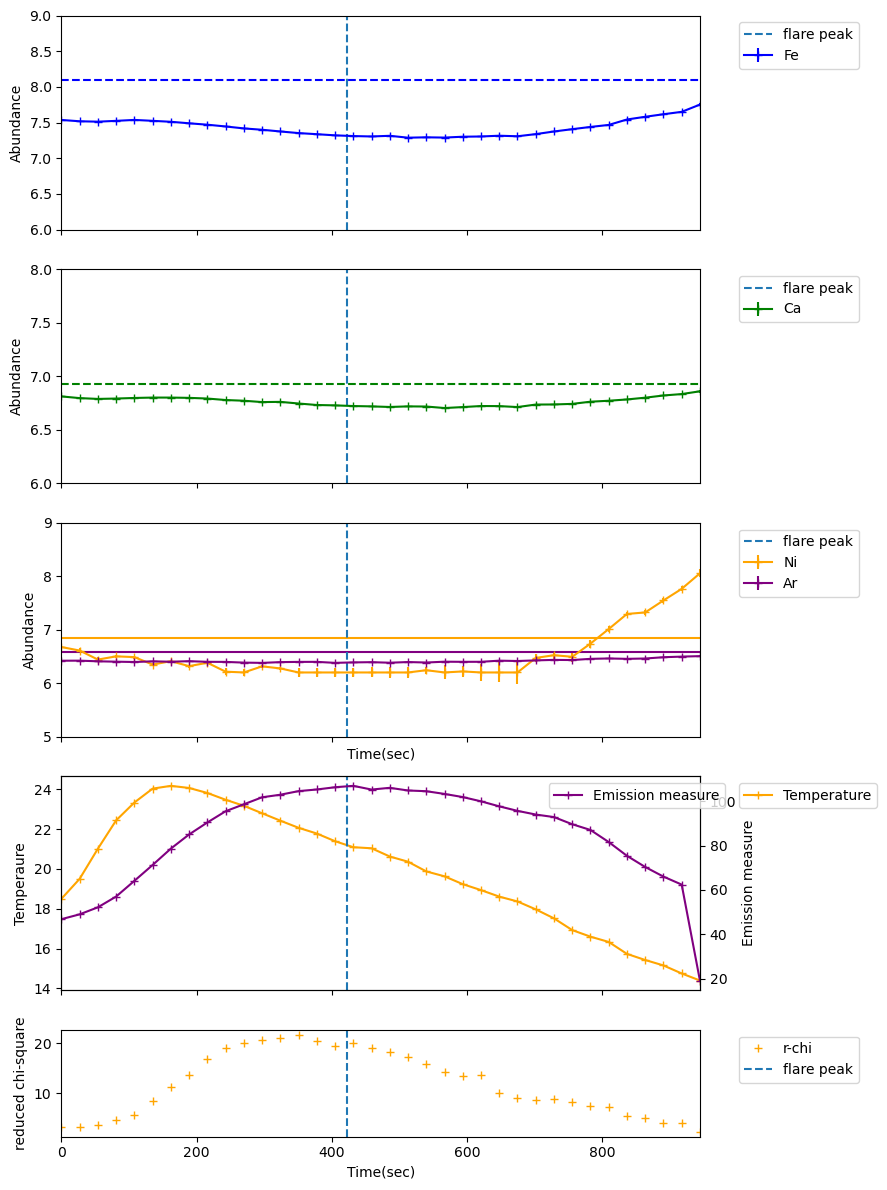

In [12]:
import matplotlib.pyplot as plt

# Create a figure with a grid layout (4 rows, 1 column)
fig, axs = plt.subplots(5, 1, figsize=(9, 12),gridspec_kw={'height_ratios': [4, 4, 4,4, 2]}, sharex=True)





# Plot 3: Fe, Si, Ni Abundances
axs[0].errorbar(timeF, Fe_abun,yerr=Fe_err, fmt='+',linestyle='-',color='blue', label='Fe')
axs[0].axhline(y=8.10, linestyle='--', color='blue')
#axs[0].errorbar(timeSi, Si_abun,yerr=Si_err,fmt= '+',linestyle='-', label='Si',color='black')
axs[0].set_ylabel('Abundance',fontsize='10')
axs[0].axvline( 423,linestyle='--',label='flare peak')
axs[0].set_ylim(6, 9)
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: S, Ca, Ar Abundances
#axs[1].errorbar(timeS, S_abun,yerr=S_err, fmt='+',linestyle='-',color='r',label='S')
#axs[1].axhline(y=7.27, linestyle=':', color='r')
axs[1].errorbar(timeC, Ca_abun,yerr=Ca_err, fmt='+',linestyle='-', color='g', label='Ca')
axs[1].axhline(y=6.93, linestyle='--', color='g')
#axs[1].errorbar(time1, Al_abun,yerr=Al_err, fmt='+', color='orange', label='Al')
#axs[1].axhline(y=7.04, linestyle='-', color='orange')
axs[1].set_ylabel('Abundance',fontsize='10')
axs[1].axvline( 423,linestyle='--',label='flare peak')
axs[1].set_ylim(6, 8)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')



axs[2].errorbar(timeN, Ni_abun,yerr=Ni_err, fmt='+',linestyle='-',color='orange', label='Ni')
axs[2].axhline(y=6.84, linestyle='-', color='orange')
axs[2].errorbar(timeA, Ar_abun,yerr=Ar_err, fmt='+',linestyle='-', color='purple', label='Ar')
axs[2].axhline(y=6.58, linestyle='-', color='purple')
axs[2].set_ylabel('Abundance')
axs[2].set_xlabel('Time(sec)', fontsize='10')
axs[2].axvline( 423,linestyle='--',label='flare peak')
axs[2].set_ylim(5,9)
axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')




#axs[3].errorbar(timeMg, Mg_abun,yerr=Mg_err, fmt='+',linestyle='-',color='orange', label='Mg')
#axs[3].axhline(y=8.15, linestyle='-', color='orange')
#axs[3].set_ylabel('Abundance')
#axs[3].set_xlabel('Time(sec)', fontsize='10')

#axs[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')



axs[3].plot(time1, temperatur,'+',linestyle='-',color='orange', label='Temperature')
axs[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[3].axvline( 423,linestyle='--',label='flare peak')
axs[3].set_ylabel("Temperaure")
ax2 = axs[3].twinx()
ax2.plot(time1, norm,'+',linestyle='-', color='purple', label='Emission measure')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='best')
ax2.set_ylabel("Emission measure")
axs[4].plot(time1, r_chi,'+',color='orange', label='r-chi')
axs[4].set_ylabel('reduced chi-square')
axs[4].set_xlabel('Time(sec)', fontsize='10')
axs[4].axvline( 423,linestyle='--',label='flare peak')
axs[4].set_xlim(0, 945)
axs[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout to prevent overlapping
fig.tight_layout()
plt.savefig("Temp_ev_daxss1.png",dpi=500, bbox_inches='tight')
plt.show()